**Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!**

**Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.**





Пусть 
*C - событие РГК (редкая группа крови)у подозреваемого.*
*B - событие: убийца - наш подозреваемый*

Прокурор взял за ответ вероятность $1 - P(C|\bar B)$

 $P(C|\bar B)$ -  вероятность, что у подозреваемого РГК, при условии что он невиновен. А требуется найти вероятность, что подозреваемый виновен при условии, что у него РГК $P(B|C)$, а они не равны.

  $$P(B|C) = P(C|B)*P(B)/( P(C|B)*P(B) +  P(C|\bar B)*P(\bar B))$$

  


**Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?**






Мне кажется, что если считать, что подозреваемый - случайный, равновероятный человек из города с редкой группой крови,  то адвокат прав насчет вероятности, что этот он - убийца с вероятностью 1/10000. Он рассчитывает условную вероятность того, что подсудимый виновен, при условии, что он имеет редкую группу крови: \\
P(подсудимый виновен| подсудимый имеет РГК).

Но обычно бывает какой-то большой, но ограниченный круг подозреваемых, а не весь город, и не все люди с РГК равновероятны. Допустим, подозреваемых N человек
```
 A - убийца имеет РГК
 B1 - событие убийца-  наш подозреваемый 
 Bi - событие убийца -  i-й человек из N(i=1..N-1)подозреваемых.
 ```
Тогда 

$$P(A|B1) = 1$$
$$P(B1) = P(Bi) = 1/N$$
$$P(A|Bi) = 0.01$$
$$P(B1|A) = P(A|B1) * P(B1)/\sum{P(A|Bi) * P(Bi)} = 1 * (1/N)/(1*1/N + (N-1) * 0.01* 1/N) = 100/(99 + N )$$


Отсюда видно, что если подозреваемый один, то вероятность равна 1. При N равным 1 млн вероятность приблизительно равна 1/10000






**Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%. Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного). Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?**




In [4]:
P_neg_ill = 0.05
P_pos_health = 0.05
P_ill = 0.01
P_health = 1 - P_ill



Обозначим ошибки теста FP и FN.

Найдем априорную вероятность болезни после положительного теста в зависимости от FP и FN

$$p(I|+) = (P(+|I) * P(I))/(P(+|I)*P(I) + P(+|H)*P(H)) = ((1 - FN) * 0.01)/((1 - FN) * 0.01 + FP * 0.99)$$

Найдем априорную вероятность болезни после отрицательного теста в зависимости от FP и FN
$$p(I|-) = (P(-|I) * P(I))/(P(-|I)*P(I) + P(-|H)*P(H)) = FN * 0.01/(FN * 0.01 + (1 - FP) * 0.99)$$

Для того, чтобы сделать выводы мне удобнее перейти к вероятности ошибки, что человек получивший  положительный тест - здоров: 
$$p(H|+) = 1 - p(I|+) = (P(+|H) * P(H))/(P(+|H)*P(H) + P(+|I)*P(I)) = $$

$$= FP * 0.99/(FP * 0.99 + 0.01 * (1 - FN))$$

In [5]:
def P_health_pos(P_neg_ill, P_pos_health):
  global P_ill, P_health
  P = (P_pos_health * P_health)/(P_pos_health * P_health + P_ill * (1 - P_neg_ill))
  return P *100


In [6]:
def P_ill_neg(P_neg_ill, P_pos_health):
  global P_ill, P_health
  P_neg_health = 1 - P_pos_health
  P = (P_neg_ill * P_ill)/(P_neg_ill * P_ill + P_neg_health * P_health)
  return P *100


Рассчитаем вероятности $p(H|+)$ и $P(I|-)$ в процентах при ошибках FP и FN 5 процентов

In [7]:
P1 = P_health_pos(P_neg_ill, P_pos_health)
P2 = P_ill_neg(P_neg_ill, P_pos_health)
print(P1, P2)

83.89830508474576 0.05313496280552604


Рассмотрим изменение вероятности ошибок  $p(H|+)$ и $P(I|-)$ в зависимости от ошибок тестов FP, FN

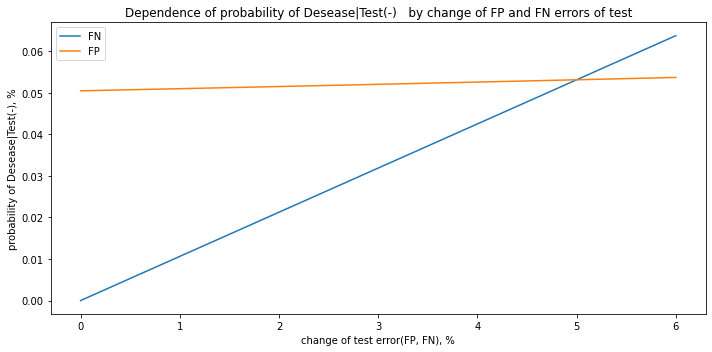

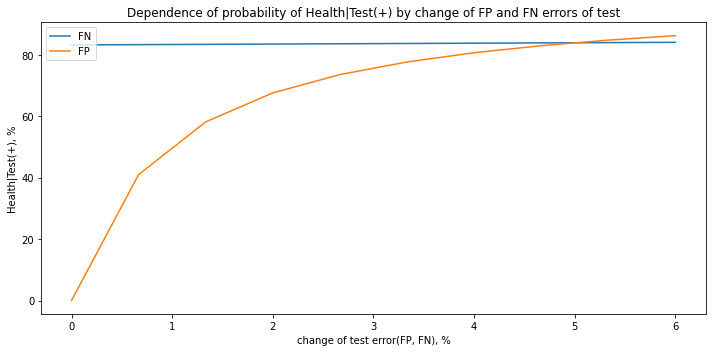

In [8]:
import matplotlib.pyplot as plt
import numpy as np
P_neg_ill_change = np.linspace(0, 0.06, 10)
P1_result_1 = P_health_pos(P_neg_ill_change, 0.05)
P2_result_1 = P_ill_neg(P_neg_ill_change, 0.05)


P_pos_health_change = np.linspace(0, 0.06, 10)
P1_result_2 = P_health_pos(0.05, P_pos_health_change)
P2_result_2 = P_ill_neg(0.05, P_pos_health_change)




fig, ax = plt.subplots(figsize=(10, 5))
#ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Dependence of probability of Desease|Test(-)   by change of FP and FN errors of test')
ax.plot(P_neg_ill_change * 100, P2_result_1, label = 'FN')
ax.plot(P_pos_health_change * 100, P2_result_2, label = 'FP')
ax.legend(loc='upper left')
ax.set_ylabel('probability of Desease|Test(-), %')
ax.set_xlabel('change of test error(FP, FN), %')
#ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()


fig, ax = plt.subplots(figsize=(10, 5))
#ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Dependence of probability of Health|Test(+) by change of FP and FN errors of test')
ax.plot(P_neg_ill_change * 100, P1_result_1,  label = 'FN')
ax.plot(P_pos_health_change * 100, P1_result_2,  label = 'FP')
ax.legend(loc='upper left')
ax.set_ylabel('Health|Test(+), %')
ax.set_xlabel('change of test error(FP, FN), %')
#ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()



На графиках видно, что при изменении FP ошибок теста, изменение отношения вероятности  положительных тестов у здоровых к изменению ошибки теста гораздо выше, чем  показатель изменения вероятности не заметить болезнь к изменению ошибки FN ошибок теста.

Вывод, который стоит сделать врачам зависит от критичности обеих ошибок. Например, в случае рака, когда ошибиться просто нельзя, возможно лучше снизить именно FN ошибки теста. Если болезнь не столь критична, то стоит обратить внимание, на то, что снижение FP ошибок гораздо эффективнее влияет на вероятность FP ошибок диагностики, чем снижение ошибок пропустить болезнь в зависимости от снижения FN.

Можно представить результирующую функцию ошибки, как взвешенную сумму изменений вероятностей ошибки $\Delta (P(H|+))$ и $\Delta (P(I|-))$ в зависимости от изменения ошибок FP, FN 
$$F(\Delta FP) = W1 * \Delta(p(H|+))(\Delta FP) + W2 * \Delta (P(I|-))(\Delta FP) $$
$$F(\Delta FN) = W1 * \Delta(p(H|+))(\Delta FN) + W2 * \Delta (P(I|-))(\Delta FN) $$


In [9]:
def P_error_FP(P_pos_health_change, w1, w2):
  return (P_health_pos(0.05, P_pos_health_change) * w1 +  P_ill_neg(0.05, P_pos_health_change) * w2)/(w1 + w2)*100

In [10]:
def P_error_FN(P_neg_ill_change, w1, w2):
  return (P_health_pos(P_neg_ill_change, 0.05) * w1 +  P_ill_neg(P_neg_ill_change, 0.05) * w2)/(w1 + w2) * 100

Например, при оценке ошибки $Δ(P(I|-)$ в 1000 раз хуже получим следующие графики, из которых делаем вывод, что стоит снижать именно FN ошибку теста, если она менятся на меньшее,чем ~ 4 процента значение

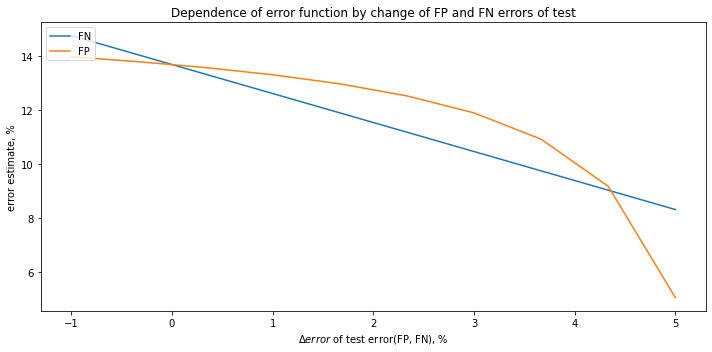

In [11]:
w1 = 1
w2 = 1000
P_error_FP1 = P_error_FP(P_pos_health_change, w1, w2)
P_error_FN1 = P_error_FN(P_neg_ill_change, w1, w2)


fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Dependence of error function by change of FP and FN errors of test')
ax.plot((0.05 - P_neg_ill_change) * 100, P_error_FN1, label = 'FN')
ax.plot((0.05 - P_pos_health_change) * 100, P_error_FP1, label = 'FP')
ax.legend(loc='upper left')
ax.set_ylabel('error estimate, %')
ax.set_xlabel('$\Delta error $ of test error(FP, FN), %')
#ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()


#plt.plot(P_neg_ill_change, P_error_2)

А при оценке ошибки $Δ(P(I|-)$ всего в 100 раз хуже получим следующие графики, из которых делаем вывод, что стоит снижать именно FP ошибку теста

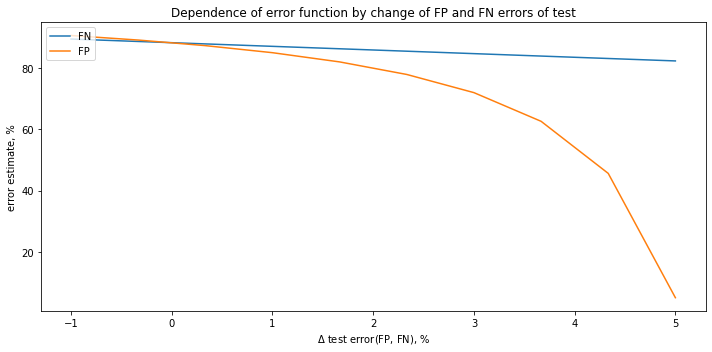

In [12]:
w1 = 1
w2 = 100

P_error_FP1 = P_error_FP(P_pos_health_change, w1, w2)
P_error_FN1 = P_error_FN(P_neg_ill_change, w1, w2)

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Dependence of error function by change of FP and FN errors of test')
ax.plot((0.05 - P_neg_ill_change) * 100, P_error_FN1, label = 'FN')
ax.plot((0.05 - P_pos_health_change) * 100, P_error_FP1, label = 'FP')
ax.legend(loc='upper left')
ax.set_ylabel('error estimate, %')
ax.set_xlabel('$\Delta$ test error(FP, FN), %')
#ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()


**Эта часть первого домашнего задания связана с анализом конкретного датасета. Датасет давайте возьмём довольно релевантный реальной жизни; он доступен по следующей ссылке:
https://ourworldindata.org/coronavirus-source-data
Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.
Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.
Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.
Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).
Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).**


Считываем данные по короновирусу по России

In [13]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/MADE/semester2/AdvancedML/owid-covid-data.csv", parse_dates = True)

In [14]:
import numpy as np
#print(data.info())
data_new = data[['date', 'total_cases', 'new_cases', 'location']]
data_new = data_new[(data_new['location']=='Russia') & (data_new['date'] >= '2020-03-03')].reset_index()
print(data_new.head())
data_new_full = data_new
data_new = data_new.iloc[0:50, :]

data_new_ln = data_new.copy()
data_new_ln_full = data_new_full.copy()
data_new_ln['total_cases'] = np.log(data_new_ln['total_cases'].to_list())
data_new_ln_full['total_cases'] = np.log(data_new_full['total_cases'].to_list())
data_new_ln['new_cases']  = 1
#print(data_new_ln.head())


   index        date  total_cases  new_cases location
0  51186  2020-03-03          3.0        0.0   Russia
1  51187  2020-03-04          3.0        0.0   Russia
2  51188  2020-03-05          4.0        1.0   Russia
3  51189  2020-03-06         13.0        9.0   Russia
4  51190  2020-03-07         13.0        0.0   Russia


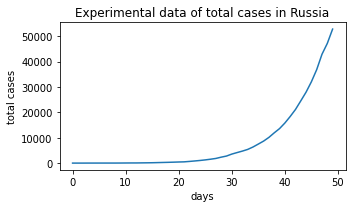

In [15]:
#from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Ridge as LR

fig, ax = plt.subplots(figsize=(5, 3))
ax.set_title('Experimental data of total cases in Russia')
ax.plot(data_new.index, data_new['total_cases'] )
ax.set_xlabel('days')
ax.set_ylabel('total cases')
#ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()



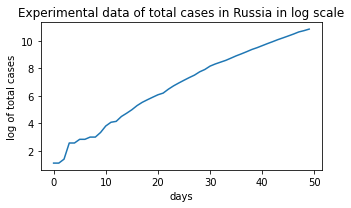

In [16]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(data_new_ln.index, data_new_ln['total_cases'] )
ax.set_title('Experimental data of total cases in Russia in log scale')
ax.set_xlabel('days')
ax.set_ylabel('log of total cases')
#ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

Для начала попробуем предсказать рост эпидемии экспонентой от линейной функции
Поскольку логарифм total_cases может оцениваться линейной зависимостью от номера дня, то обучаем Ridge классификатор на предсказание логарифма total_cases

In [17]:
from sklearn.linear_model import Ridge as LR
y = data_new_ln['total_cases']
X = pd.DataFrame()
#X['0'] = data_new_ln['new_cases']
X['0'] = data_new_ln.index
model = LR(alpha = 0.1).fit(X, y)

Получаем коэффициенты обученной модели 

In [18]:
print(model.coef_)
print(model.intercept_)

[0.19828901]
1.8207838050218728


Строим экспериментальную и смоделированную кривые логарифма total_cases

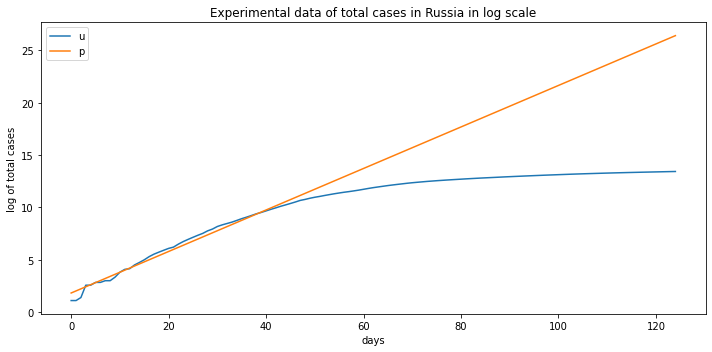

In [19]:
ndays = 125
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data_new_ln_full.index[0:ndays], data_new_ln_full.loc[0:ndays-1, 'total_cases'], label = "real" )
ax.plot(data_new_ln_full.index[0:ndays], data_new_ln_full.index[0:ndays] * model.coef_[0] + model.intercept_ , label = "model")
ax.set_title('Experimental data of total cases in Russia in log scale')
ax.set_xlabel('days')
ax.set_ylabel('log of total cases')
ax.legend("upper left")
#ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()


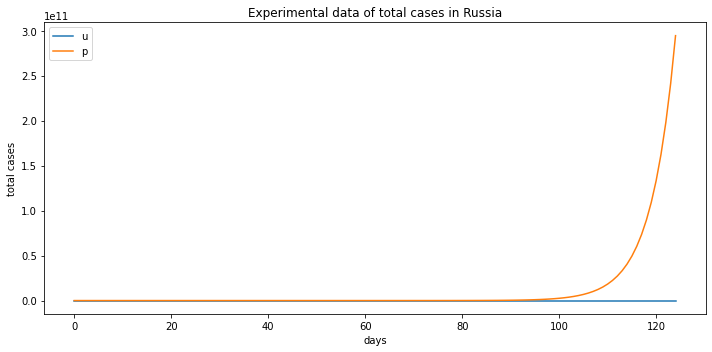

In [20]:


fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Experimental data of total cases in Russia')
ax.plot(data_new_full.index[0:ndays], data_new_full.loc[0:ndays-1, 'total_cases'], label="real" )
ax.plot(data_new_full.index[0:ndays], np.exp(data_new_full.index[0:ndays] * model.coef_[0] + model.intercept_) ,label="model")
ax.set_xlabel('days')
ax.set_ylabel('total cases')
ax.legend("upper left")
#ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

Моделируем параметры логарифмы total_cases с помощью байесовского подхода

Построим апостериорное распределение параметров модели (w0, w1), взяв априорное распределение параметров нормальным с достаточно широкой дисперсией sigma_param. Так как правдоподобие будет так же нормальным, то полученное апостериорное распределение будет нормальным. 

Для начала оценим дисперсию шума
Так как в условии написано, что априорное распределение берется достаточно широким, то sigma_param берем большим, при расчете оптимальных значений дисперсии шума и параметров пренебрегаем членами с априорным распределением и фактически оцениваем дисперсию шума из максимума правдоподобия.

$$W\_ml = (X^T * X)^{-1}*X^T y$$
$$sigma\_ml = (1/N) * \sum{(y_n - Wx)^2}$$

Оценим дисперсию шума численно


In [21]:
y = np.array(data_new_ln['total_cases'])
X =  np.array([[1, x] for  x in data_new_ln.index])

P1 = np.matmul(X.T, X)
#print(P1)
P2 = np.matmul(np.linalg.pinv(P1), X.T)
#print(P2)
wml = np.matmul(P2, y)
print(wml)    

sigma_ml = np.sqrt(((y - np.matmul(X, wml))**2).sum()/y.shape[0])
print(sigma_ml)


[1.82073715 0.19829091]
0.3490422059635658


Теперь взяв sigma_param = 100, используя оценку дисперсии шума, построим апостериорное распределние параметров w0, w1, используя формулы для нормального
апостериорного распределения параметров как свертку двух гауссов


In [22]:
sigma_params = 100

In [23]:
x = data_new_ln.index

In [24]:
def get_gauss_params():
  y = np.array(data_new_ln['total_cases'])
  X =  np.array([[1, x] for  x in data_new_ln.index])

  P1 = np.matmul(X.T, X)/(sigma_ml ** 2)
  cov_param = np.array([[sigma_params, 0], [0, sigma_params]])
  cov_param_inverse = np.linalg.pinv(cov_param)
  cov_new = np.linalg.pinv(P1 + cov_param_inverse)

  m_param = [0, 0]
  P2 = np.matmul(X.T, y)/(sigma_ml ** 2)
  m_temp = np.matmul(cov_param_inverse, m_param) + P2
  m_new = np.matmul(cov_new, m_temp)
  return cov_new, m_new

  




Получаем дисперсию и матожидания для апостериорного распределения параметров


In [25]:
cov_new, m_new =  get_gauss_params()
print(cov_new, m_new)

[[ 9.45888140e-03 -2.86632761e-04]
 [-2.86632761e-04  1.16995814e-05]] [1.8205655  0.19829611]


In [26]:
def normal_new(w0, w1):
  #print(w0.shape)
  #print(w1.shape)
  y = (np.array([w0, w1]).T - m_new)
  #print(y.shape)
  A = np.matmul(y, np.linalg.pinv(cov_new))
  #print(A.shape)
  B = np.matmul(A, y.T)
  result = (1/np.sqrt(2*np.pi * np.linalg.det(cov_new))*np.exp(-1/2*B)) 
  #print(result)
  return result



Строим heatmap распределения 

(200, 200)


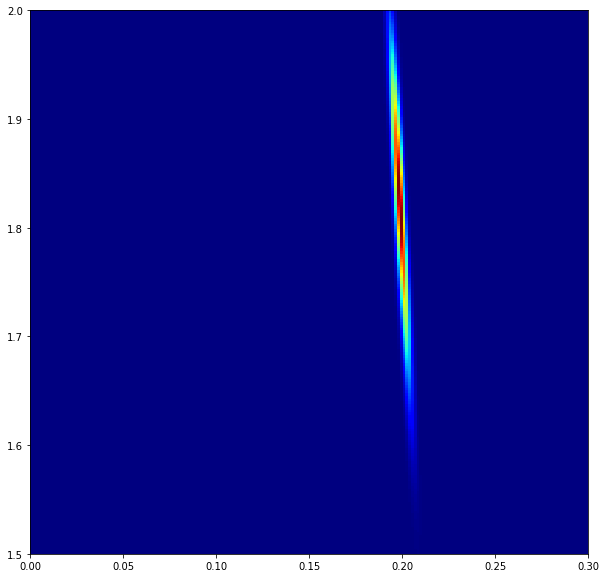

In [27]:
n = 200
w0, w1 = np.meshgrid(np.linspace(1.5, 2.0, n), np.linspace(0, 0.3, n))
fig, ax = plt.subplots(figsize=(10, 10))
result = np.zeros((n, n))
x = data_new_ln.index
for i in range(n):
  for j in range(n):
  
    d = normal_new(w0[i,j], w1[i,j])
    result[i,j] = d
print(result.shape)                             
ax.pcolormesh(w1, w0, result, cmap=plt.cm.jet)


Теперь посэмплируем это распределение и построим различные экспоненты с посэмплированными параметрами, а также оценим в зависимости от этих параметров распределение числа случаев к 1 мая, 1 июня и 1 сентября. Так же построим экспоненту для максимальной апостериорной гипотезы 

In [28]:
import datetime
time1 = datetime.datetime(2020, 6, 1) - datetime.datetime(2020, 3, 3)
time2 = datetime.datetime(2020, 5, 1) - datetime.datetime(2020, 3, 3)
time3 =datetime.datetime(2020,9,1) - datetime.datetime(2020,3, 3)
def myplot_sample_lines(mu, sigma, n=200, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)
    ndays = 50
    x = range(0, ndays, 1)
    # plt.axis('equal')

    sept1 = []
    june1 = []
    may1 = []


    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_title('Different samples of model with with parameters sampled from MAP distribution of params')
    
    ax.set_xlabel('days')
    ax.set_ylabel('total cases')
    

    fig.tight_layout()

    for w in my_w:
        plt.plot(x, np.exp(w[0] + w[1]*x), linewidth=.1, color="0.3")

        june1.append(np.exp(w[0] + w[1]*time1.days))
        may1.append(np.exp(w[0] + w[1]*time2.days))
        sept1.append(np.exp(w[0] + w[1]*time3.days))
    ax.plot(x, np.exp(mu[0] + mu[1]*x), linewidth=1, color="red", label = 'model')  
    ax.plot(data_new_full.index[0:ndays], data_new_full.loc[0:ndays-1, 'total_cases'] , linewidth=1, color="blue", label = 'real')      
    ax.legend(loc='upper left')

    fig, ax = plt.subplots(figsize=(5, 3))
    ax.set_title('estimated total cases for 1 may for different models')
    ax.set_xlabel('number of cases')
    ax.set_ylabel('kol_samples')
    ax.hist(may1, bins = 100)
    
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.set_title('estimated total cases for 1 june for different models')
    ax.set_xlabel('number of cases')
    ax.set_ylabel('kol_samples')
    ax.hist(june1, bins = 100)

    fig, ax = plt.subplots(figsize=(5, 3))
    ax.set_title('estimated total cases for 1 sept for different models')
    ax.set_xlabel('number of cases')
    ax.set_ylabel('kol_samples')
    ax.hist(sept1, bins = 100)
    

    #plt.ylim((-3, 3))
    #plt.xlim((-3, 3))
    #if not points is None:
    #    plt.scatter(points[0], points[1], marker='*', s=200)

Строим просемплированные экспоненты, предсказанную экспоненту и реальную, а также гистограмму распределения количества случаев к различным датам, в зависимости от выбранных параметров модели


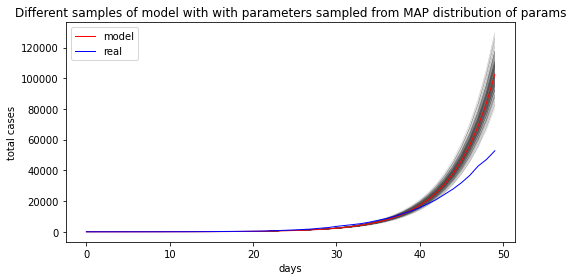

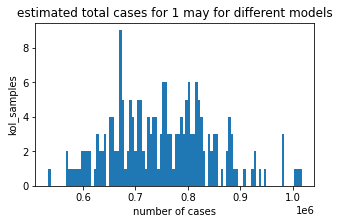

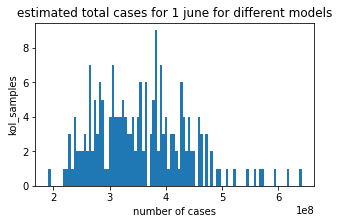

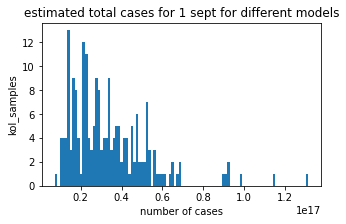

In [29]:
#cov = [[0.1,0], [0, 0.1]]
myplot_sample_lines(m_new,  cov_new, n=200, points=None)

Теперь переходим к рассчету "по-настоящему оптимальных гиперпараметров" альфа и бета  :))  , выбранных на основе оптимизации логарифма обоснованности по все возможным значениям альфа и бета

In [30]:
from scipy import optimize
days = pd.DataFrame()
X[1] = 1
def fun(t):
    alpha = t[0]
    beta = t[1]
    #print(y.shape)
    
    #print(delta)
    
    M = 1
    N = 50
    #print(temp1, temp2)
    #print(X.shape)
    temp = np.matmul(np.array(X.T),np.array(X))
    #print(temp)

    A = beta * temp + alpha * np.eye(2)
    Ainv = np.linalg.pinv(A)
    m_new= beta * np.matmul(np.matmul(Ainv, X.T), y)
    #print(np.linalg.det(A))

    temp = np.matmul(np.array(X), np.array(m_new))
    #print(temp)
    delta = np.array(y) - temp

    temp1 = np.matmul(delta.T, delta)
    temp2 = np.matmul(m_new.T, m_new)
    #print(np.linalg.det(A))
    result = -(M/2*np.log(alpha) + N/2*np.log(beta) - 1/2*np.log(np.linalg.det(A)) - beta/2 * temp1 - alpha/2 * temp2)
    #print(result)
    return result
def calc_best_beta_and_alpha():
  #print(sigma_ml)  
  x0 = [0.5, 1/(sigma_ml * sigma_ml)]
  result = optimize.minimize(fun, x0, bounds=((0.01, 10), (0.01, 10))) 
  return result

Для начала построим поверхность распределения функции оптимизации в районе предполагаемого решения 

(100, 100)



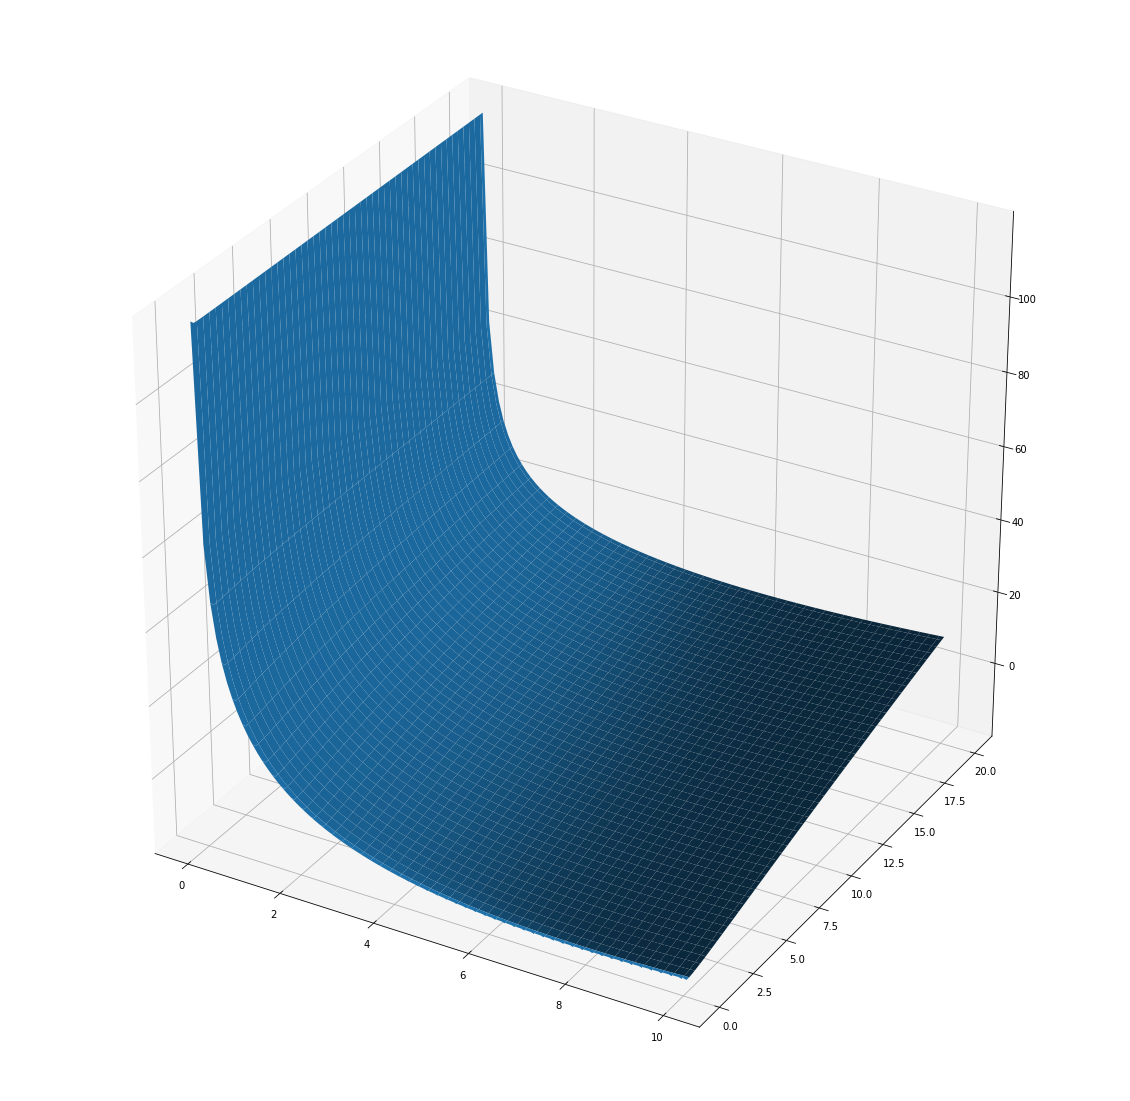

In [31]:
n = 100
al, beta = np.meshgrid(np.linspace(0.01, 20.0, n), np.linspace(0.01, 10, n))


fig = plt.figure(figsize = (20, 20))
ax = fig.add_subplot(1, 1, 1, projection='3d')

result = np.zeros((n, n))
for i in range(n):
  for j in range(n):
    param = [al[i,j], beta[i,j]]
    result[i,j] = fun(param)
print(result.shape)                             
ax.plot_surface(beta, al, result)
print()

Получаем оптимальные альфа и бета, а из них дисперсию шума

In [32]:
result = calc_best_beta_and_alpha()
print(result)
beta = result.x[1]
alpha = result.x[0]
sigma_noise = 1/np.sqrt(beta)
print(f"sigma_noise = {sigma_noise} ")
print(f"alpha = {alpha} ")

      fun: -17.856710542636925
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-8.88178420e-06,  7.46069873e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 24
      nit: 6
   status: 0
  success: True
        x: array([0.29895898, 7.87982268])
sigma_noise = 0.3562392582109586 
alpha = 0.29895897513743575 


В результате проделанного исследования видим, что экспонента очень плохо моделирует данные уже после 50 дня.

Теперь попробуем промоделировать наши данные сигмоидой. 

Рассчитываем новую прогнозируемую переменную $ln(y'(x))$ (x - номер дня, y(i) - количество заболевших каждый день). 
$$ln(y'(x)) = ln((\int\limits_{-\infty}^xe^{(at^2 + bt + c)}dt)') = (ax^2 + bx + c)$$
Оценим данную величину из данных, как:
$$ynew(i) = ln(y(i+1) - y(i)/(i+1) - (i)) = ln(new\_cases) $$

Фактически, это количество новых случаев каждый день.

$$p(w|D)=N(ynew|(w0 + w1x + w2x^2, signoise) * N(w|0, sigparam^2 * I) $$


Новыми признаками будет $x$,$x^2$. 

Построим графики логарифма новых случаев и график просто новых случаев

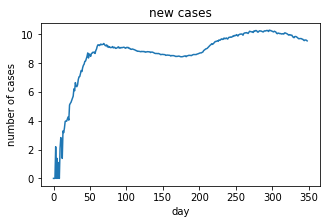

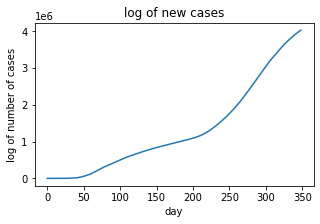

In [33]:
import numpy as np
#print(data.info())
data_new = data[['date', 'total_cases', 'new_cases', 'location']]
data_new = data_new[(data_new['location']=='Russia') & (data_new['date'] >= '2020-03-03')].reset_index()
#print(data_new.shape)
y_new = []
y_total = data_new['total_cases'].to_list() 
new_cases_column = data_new['new_cases'].to_list() 
#print(data_new.head())
new_cases_list = []
ndays = len(y_total) 
for i in range(0, len(y_total) - 1):
  new_cases = new_cases_column[i]
  if (new_cases == 0):
    new_cases = 1
  new_cases_list.append(new_cases)
  y_new.append(np.log(new_cases))
 
#print(new_cases_column[0:50])


ndays = len(y_new) 
x = range(0, ndays) 

fig, ax = plt.subplots(figsize=(5, 3))
ax.set_title('new cases')
ax.set_xlabel('day')
ax.set_ylabel('number of cases')
ax.plot(x, y_new)  

fig, ax = plt.subplots(figsize=(5, 3))
ax.set_title('log of new cases')
ax.set_xlabel('day')
ax.set_ylabel('log of number of cases')
plt.plot(x, y_total[0: ndays])  

Обучаем модель на первых 50 днях с помощью LinearRegression из skealearn

In [34]:
NUM_DAYS = 300
NUM_DAYS_GOOD = 200
NUM_TRAIN_DAYS = 50
X = pd.DataFrame()
#X['0'] = data_new_ln['new_cases']
X['0'] = x[0:NUM_TRAIN_DAYS]
X['1'] = [t*t for t in x[0:NUM_TRAIN_DAYS]]
#print(X)
y = y_new[0:NUM_TRAIN_DAYS]
#print(y)
#print(y)
#print(X)
model = LR().fit(X, y)

Получаем коэффициенты регрессии

In [35]:
print(model.coef_)
print(model.intercept_)

[ 0.27521497 -0.00182201]
-0.3928914002893711


Строим распределение логарифма новых случаев от количества дней с начала эпидемии

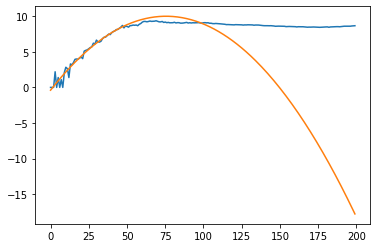

In [36]:
new_cases_data = pd.DataFrame(y_new[0:NUM_DAYS_GOOD])
new_cases_full = pd.DataFrame(y_new)
plt.plot(new_cases_data.index, new_cases_data.iloc[:,0])
plt.plot(new_cases_data.index, (new_cases_data.index * model.coef_[0] + new_cases_data.index *  new_cases_data.index * model.coef_[1] +  model.intercept_) )

In [37]:
#from  scipy import integrate
#def calc_total_case_by_model(day):
#  def func(t):
#    return np.exp(t * model.coef_[0] + t * t * model.coef_[1] +  model.intercept_)
#  result = integrate.quad(func, -np.inf, day)
  #print(result)
  
#  return result

Суммируем предсказанные новые случаи до текущего дня, получаем зависимость
предсказанного общего числа случаев от номера дня

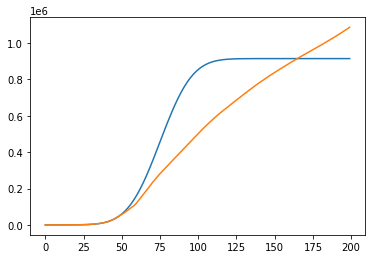

In [38]:
days = pd.DataFrame()
days[0] = new_cases_data.index
days[1] = new_cases_data.index**2
#print(days)
new_cases_pred_ln = model.predict(days)
new_cases_pred = np.exp(new_cases_pred_ln)
total_case_cumsum = np.cumsum(new_cases_pred)


total_cases_data = pd.DataFrame(y_total[0:200])
total_cases_full = pd.DataFrame(y_total)
plt.plot(total_cases_data.index, total_case_cumsum)
plt.plot(total_cases_data.index, total_cases_data.iloc[:,0])

In [39]:
def get_total(w):
  new_cases_pred_ln = [w[0] + w[1] * x + w[2] * x * x for x in new_cases_full.index ]
  new_cases_pred = np.exp(new_cases_pred_ln)
  total_case_cumsum = np.cumsum(new_cases_pred)
  #print(total_case_cumsum.shape)
  #print(days)
  return total_case_cumsum

Считаем, что дисперсия шума не меняется и оцениваем ее как  СКО предсказанных значений от реальных

In [40]:
sigma_ml_sigmoid = np.std(new_cases_pred_ln[0:50] - y_new[0:50])
print(sigma_ml_sigmoid)

0.4891718374380323


In [41]:
sigma_params = 100

Используя рассчитанную дисперсию шума и дисперсию параметров 100, рассчитываем параметры MAP

In [42]:

def get_gauss_params_sigmoid():
  y_1 = y[0:50]
  x_1 = x[0:50]
  #y = np.array(data_new_ln['total_cases'])
  X =  np.array([[1, x, x*x] for  x in x_1])

  P1 = np.matmul(X.T, X)/(sigma_ml_sigmoid ** 2)
  cov_param = np.array([[sigma_params, 0, 0], [0, sigma_params, 0], [0, 0, sigma_params]])
  cov_param_inverse = np.linalg.pinv(cov_param)
  cov_new = np.linalg.pinv(P1 + cov_param_inverse)

  m_param = [0, 0, 0]
  P2 = np.matmul(X.T, y)/(sigma_ml_sigmoid ** 2)
  m_temp = np.matmul(cov_param_inverse, m_param) + P2
  m_new = np.matmul(cov_new, m_temp)
  return cov_new, m_new

In [43]:
cov_new_sigmoid, m_new_sigmoid = get_gauss_params_sigmoid()

Получаем параметры матожидания и дисперсия апостериорного распределения параметров

In [44]:
print(cov_new_sigmoid, m_new_sigmoid)

[[ 3.97861732e-02 -3.21449462e-03  5.41160454e-05]
 [-3.21449462e-03  3.54470356e-04 -6.76546104e-06]
 [ 5.41160454e-05 -6.76546104e-06  1.38076883e-07]] [-0.39642375  0.27560911 -0.00182956]


In [45]:
def myplot_sample_lines_sgimoid(mu, sigma, n=5000, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)
    #print(my_w)
    #x = range(0, 50, 1)
    # plt.axis('equal')

    sept1 = []
    june1 = []
    may1 = []
    last_day = []

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Different samples of model with with parameters sampled from MAP distribution of params')
    
    ax.set_xlabel('days')
    ax.set_ylabel('log of total cases')
    ax.set_ylim(bottom = 0, top = 5e6)
    

    #plt.figure(figsize = (10, 10))

    

    for w in my_w:
        total = get_total(w) 
        #print(total)
        
        ax.plot(new_cases_full.index[1:200], total[1:200], linewidth=0.1, color="0.3")
        june1.append(total[time1.days])
        may1.append(total[time2.days])
        sept1.append(total[time3.days])
        last_day.append(total[-1])
        #print(total[-1])
        #break


    #print(len(total))
    ax.plot(total_cases_data.index[1:200], total_cases_data.iloc[1:200,0], linewidth=1, color='blue', label = 'real')
    ax.plot(total_cases_data.index, total_case_cumsum, linewidth=1, color='red', label ='model')
    ax.legend(loc='upper left')

    return last_day, may1, june1, sept1, total_case_cumsum[-1]

    #plt.ylim((-3, 3))
    #plt.xlim((-3, 3))
    #if not points is None:
    #    plt.scatter(points[0], points[1], marker='*', s=200)

Тут мы должны просэмплировать различные сигмоиды, сделать распределение предсказаний к 1 маю, 1 сентября и 1 июня и к последнему записанному дню.
Подсчитать 10 и 90  перцентили распределения числа случаев и получить пессимистичные и оптимистичные прогнозы

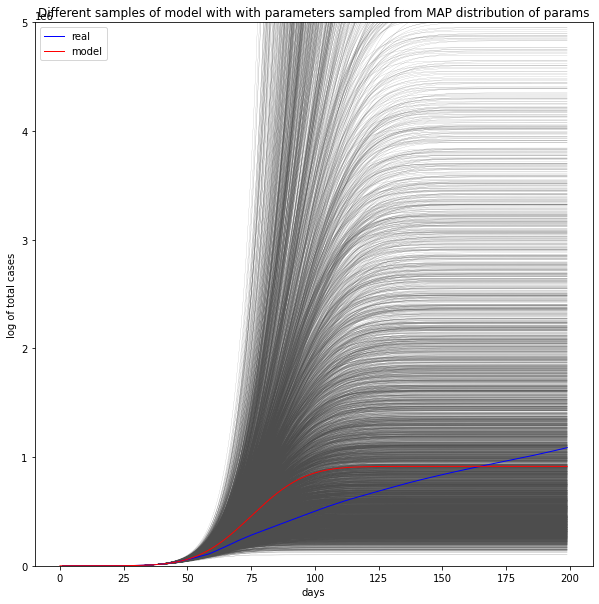

In [46]:
last_day, may1, june1, sept1, mean_prediction = myplot_sample_lines_sgimoid(m_new_sigmoid, cov_new_sigmoid)




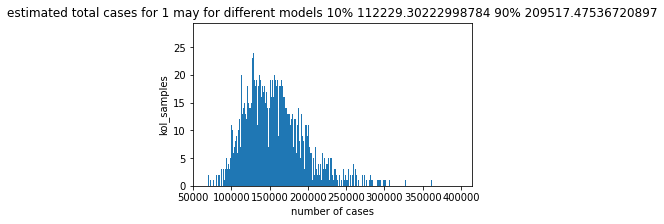

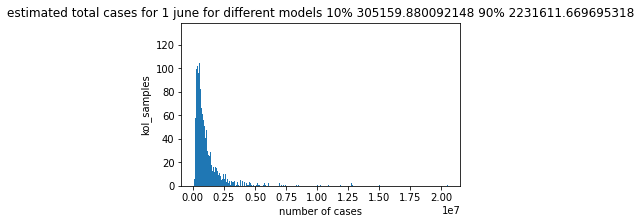

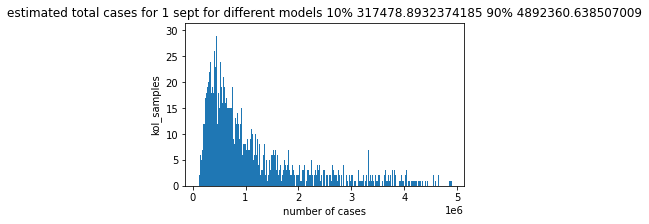

In [47]:
p1 = np.percentile(may1, 90)
p2 = np.percentile(may1, 10)

fig, ax = plt.subplots(figsize=(5, 3))
ax.set_title(f'estimated total cases for 1 may for different models 10% {p2} 90% {p1}')
ax.set_xlabel('number of cases')
ax.set_ylabel('kol_samples')
ax.hist(may1, bins = 1000)
    
p1 = np.percentile(june1, 90)
p2 = np.percentile(june1, 10)

fig, ax = plt.subplots(figsize=(5, 3))
ax.set_title(f'estimated total cases for 1 june for different models 10% {p2} 90% {p1}')
ax.set_xlabel('number of cases')
ax.set_ylabel('kol_samples')
ax.hist(june1, bins = 1000)


p1 = np.percentile(sept1, 90)
p2 = np.percentile(sept1, 10)
    #print(p1, p2)
filtered = list(filter(lambda t: ((t <= p1)), sept1))

fig, ax = plt.subplots(figsize=(5, 3))
ax.set_title(f'estimated total cases for 1 sept for different models 10% {p2} 90% {p1}')
ax.set_xlabel('number of cases')
ax.set_ylabel('kol_samples')
_ = ax.hist(filtered, bins = 1000)

Вот такое эмпирическое распределение числа случаев на последний день, ограниченное 90перцентилем

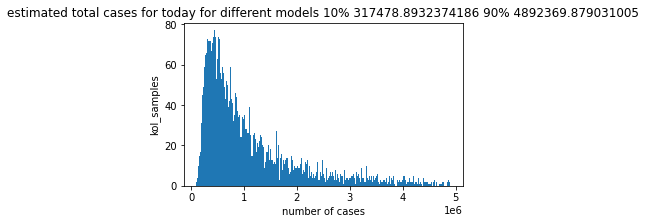

In [48]:
p1 = np.percentile(last_day, 10)
p2 = np.percentile(last_day, 90)
#p2 = np.percentile(last_day, 80)



fig, ax = plt.subplots(figsize=(5, 3))
ax.set_title(f"estimated total cases for today for different models 10% {p1} 90% {p2}")
    
ax.set_xlabel('number of cases')
ax.set_ylabel('kol_samples')
#ax.set_xlim(left = p1, right = p2 )
    
#ax.hist(last_day,  bins = 10)

filtered = list(filter(lambda t:((t <= p2)), last_day))

#print(type(filtered))
_ = ax.hist(list(filtered),  bins = 300)
    #print(last_day)

В результате получаем значения предсказаний на последний день для 90перцентиля и для 10перцентиля). А так же реальное число заболеваний на этот день

In [49]:
print(f"10% {p1}")
print(f"90% {p2}")
print(f"Real {y_total[-1]}")
print(f"Best model {mean_prediction}")

10% 317478.8932374186
90% 4892369.879031005
Real 4040505.0
Best model 914579.5020593355


In [50]:
#xарактеристики теоретического предсказательного распределения для log(new_cases).
#def get_prediction_gauss(m_new, cov_new, day):
#    day_vec =np.array([1, day, day * day])
#    #print(m_new)
#    m_pred = np.multiply(np.array(m_new).T, day_vec)
#    cov_pred = sigma_ml_sigmoid * sigma_ml_sigmoid + np.multiply(np.multiply((day_vec).T, cov_new), day_vec)
#    return m_pred, cov_pred

In [51]:
#m_pred, cov_pred = get_prediction_gauss(m_new_sigmoid, cov_new_sigmoid, 200)
#print(m_pred, cov_pred)

Теперь посмотрим на другие страны. Здесь исследование можно назвать неоконченным, но хотелось показать что какая-то работа сделана)

In [52]:
countries = list(set(data['location'].to_list()))
#print(len(countries))

Самое главное в процессе определить, откуда начинать обучаться - начало эпидемии. Пытаюсь сгладить сильные скачки новых случаев, сглаживая кривую. Это делаю, разбивая весь период на куски и находя сумму по каждому, огрубляя кривую. Затем оцениваю точку стабильного рост числа случаев на новой кривой, и таким образом получаю точку начала эпидемии.

In [61]:
def find_begin(new_cases_data):
   n = len(new_cases_data)
   mean_new = []
   scale = 20
   ibegin = 0
   found = 0
   for i in range(0, n, scale):
      mean_new.append(sum(new_cases_data[i: i + scale]))

   s = 0 
   for i in range(1,  len(mean_new)):
     if (mean_new[i] > 1.5 * mean_new[i - 1]):
        s += 1
     else:
        s = 0    
     if s == 3:
       #print("*******************")
       ibegin = scale * (i - 3)
       #print(mean_new[i], mean_new[i-1], mean_new[i-2])
       found = 1 
       break   
   if found == 0:
     #print("found = 0")
     return 0, 0, mean_new
     

   #print(ibegin)
   return 1, ibegin, mean_new#, date_begin  


In [59]:
def get_best_params(data_cases, train_size):
  #print("begin*****************")
  data_new = data_cases[data_cases['total_cases'] >= 3].reset_index()
  y_total = data_new['total_cases'].to_list() 
  new_cases_data = data_new['new_cases'].to_list() 
  dates = pd.to_datetime(data_new['date'].to_list())
  if len(dates) == 0:
    #print("empty")
    #print(data_new.head())
    return None, None, None, None, None, None, None,None
  date_min = min(dates)
  #print(date_min)
  new_cases_list = []
  new_cases_ln = []
  days = []
  i_prev = 0
  result, ibegin, mean_new = find_begin(new_cases_data)
  if result == 0:
    return None, None, None, None, None, None, None,None
  for i in range(1, len(y_total)):
    day = dates[i]
    new_cases = new_cases_data[i]
    if (new_cases <= 0):
       new_cases = 1
       
    
    new_cases_list.append(new_cases)
    new_cases_ln.append(np.log(new_cases))
    days.append(day)
    
  #print(new_cases_ln)
  n = len(new_cases_ln)
  
  if (len(new_cases_ln) == 0):
     return None, None, None, None, None, None, None, None
  temp = 0
  dmin = ibegin
  date_min = dates[ibegin]
  #print(dmin, len(new_cases_ln))
  if dmin + train_size >= n:
    train_size = n - dmin
  X1 = pd.DataFrame()
  X1['0'] = day_num = range(0,  train_size)
  X1['1'] = [t*t for t in day_num]
  #print(X1)
  y1 = new_cases_ln[dmin: dmin + train_size]
  #print(y1)
  model = LR(alpha=0.01).fit(X1, y1)
  #print("after")
  X2 = pd.DataFrame()
  X2['0'] = day_num = range(0, n - dmin)
  X2['1'] = [t*t for t in day_num]
  #print(X2)

  #print(X2)

  Y = model.predict(X2)
  new_cases_pred_ln = []
  for i in range(n):
     if i < dmin:
       new_cases_pred_ln.append(0)
     else :
       new_cases_pred_ln.append(Y[i - dmin] )
  new_cases_pred = np.exp(new_cases_pred_ln)
  #plt.plot(new_cases_pred_ln)
  #print(new_cases_pred)
  total_case_cumsum = np.cumsum(new_cases_pred)
  coef = [model.coef_[1], model.coef_[0], model.intercept_]
  #print("end*****************")
  #print(days)
  return date_min, days, total_case_cumsum, coef, new_cases_list, new_cases_pred, mean_new, ibegin
  



In [63]:
days_all = {}
total_case_cumsum_all = {}
coef_all = {}


countries_new = []
countries_data = {}
new_cases_all = {}
mean_new_cases = {}
new_cases_pred_loc = {}

countries_info = {}
ibegin_all = {}
#for loc in loc1: #countries:
for loc in countries:
  #if loc in countries_bad:
   # continue
  #print(loc)
  data_loc = data[data['location'] == loc]
  data_min_loc, days_loc, total_case_cumsum_loc, coef, new_cases_list, new_cases_pred, mean_new_cases_list, ibegin = get_best_params(data_loc, 150)
   
  if data_min_loc is None:
    continue
  if coef[0] > 0:
    continue

  countries_new.append(loc)
  ibegin_all.update({loc : ibegin})
  days_all.update({loc : days_loc}) 
  total_case_cumsum_all.update({loc :total_case_cumsum_loc})
  #print(coef)
  coef_all.update({loc : coef})
  new_cases_all.update({loc : new_cases_list}) 
  mean_new_cases.update({loc : mean_new_cases_list})
  new_cases_pred_loc.update({loc:new_cases_pred }) 



  
  

In [64]:
n = len(countries_new)
fig = plt.figure(figsize = (100, 100))
axes = []
i = 0
m = 100

for loc in countries_new[0:m]:
    axes.append(fig.add_subplot(10, 10, i + 1))
    axes[i].set_title(loc)
    axes[i].plot(new_cases_all[loc])
    axes[i].plot(new_cases_pred_loc[loc])
    #axes[i].plot(mean_new_cases[loc])
    begin = [ibegin_all[loc]]
    axes[i].scatter(begin, 0,   marker='*', s=1000)
    i += 1
    #axes.append(fig.add_subplot(m, 2, i + 1))
    #axes[i].set_title(loc)
    #axes[i].plot(mean_new_cases[loc])
    #i += 1
    
    



Output hidden; open in https://colab.research.google.com to view.

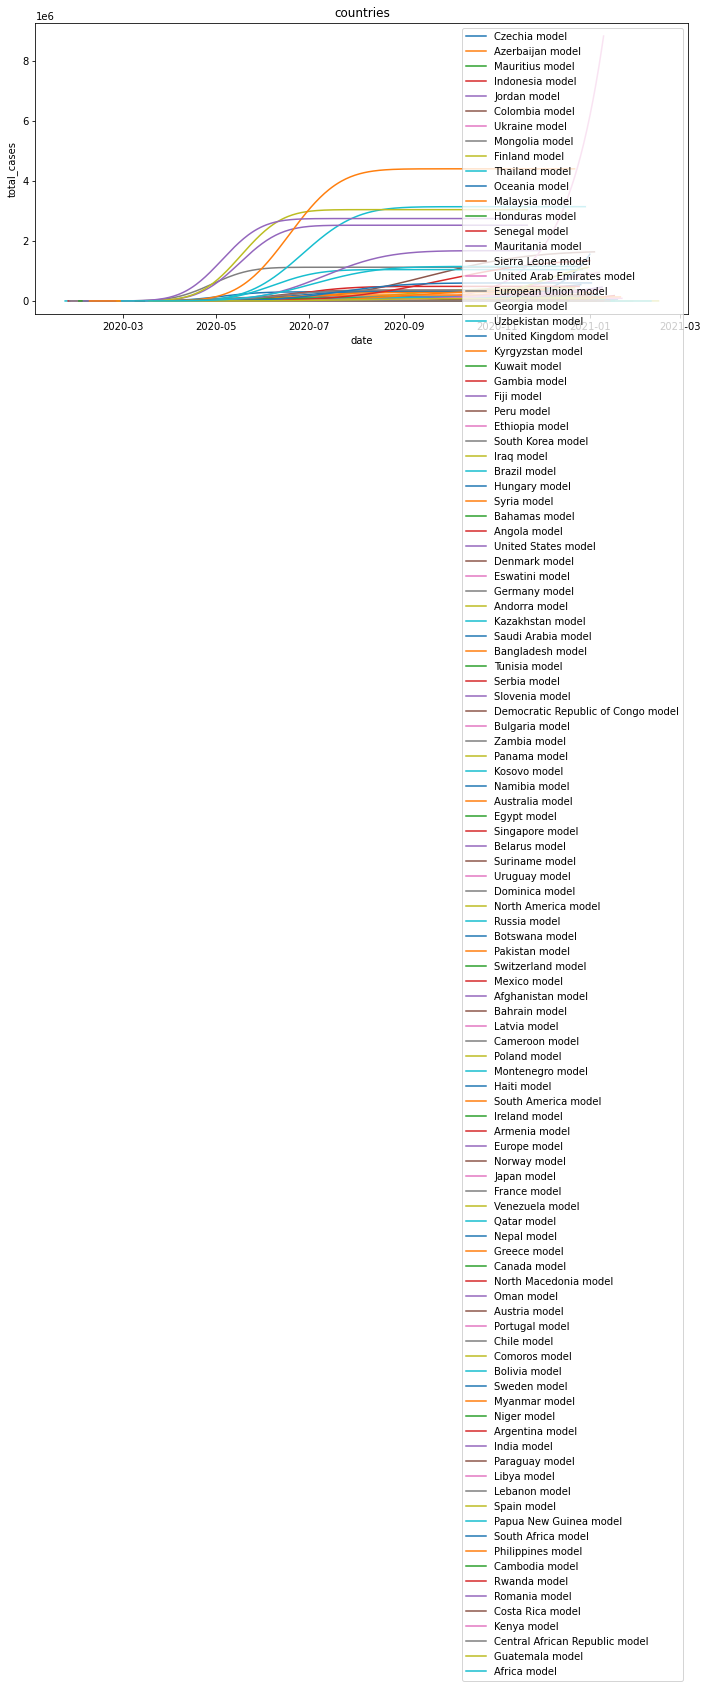

In [57]:
import matplotlib as mpl
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('countries')

ndays = 300
ax.set_xlabel('date')
ax.set_ylabel('total_cases')
fig.tight_layout()

#loc1 = ['Morocco', 'Belgium', 'Azerbaijan', 'Niger', 'United Arab Emirates', 'Eswatini', 'Luxembourg',  'Mali', 'Mongolia', 'Tanzania', 'Madagascar', 'Uruguay', 'Oceania', 'India', 'Bangladesh', 'Samoa', 'Eritrea', 'Cayman Islands', 'Togo', 'Kosovo', 'South Africa', 'Libya', 'Spain', 'Bermuda', 'Bosnia and Herzegovina', 'Netherlands', 'Nigeria', 'Germany', 'Pakistan', 'Haiti', 'Bolivia', 'Guatemala', 'World', 'Canada', 'Ghana', 'Egypt', 'Greenland', 'Bahamas', 'Laos', 'Vatican', 'Poland', 'Isle of Man', 'Afghanistan', 'Bahrain', 'Jersey', 'Lithuania', 'Sweden', 'Philippines', 'Qatar', 'Turkey', 'Venezuela', 'Antigua and Barbuda', 'Brazil', 'Liechtenstein', 'Turks and Caicos Islands', 'Syria', 'Nicaragua', 'Guyana', 'Equatorial Guinea', 'Saudi Arabia', 'Malta', 'Bulgaria', 'Finland', 'Yemen', 'Austria', 'Cuba', 'Sierra Leone', 'Gabon', 'Ethiopia', 'Iran', 'Jamaica', 'Romania', 'Andorra', 'Senegal', 'Indonesia', 'Argentina', 'Hungary', 'Montenegro', 'Papua New Guinea', 'Suriname', 'Seychelles', 'Djibouti', 'Georgia', 'Saint Vincent and the Grenadines', 'Zimbabwe', 'Greece', 'Jordan', 'Tajikistan', 'Hong Kong', 'Dominica', 'Faeroe Islands', 'Iraq', 'Gambia', 'Chile', 'Taiwan', 'Italy', 'Slovakia', 'European Union', 'North America', 'Lebanon', 'Burkina Faso', 'South Korea', 'Brunei', 'Vietnam', 'Ukraine', 'Rwanda', 'Kenya', 'Iceland', 'Portugal', 'Serbia', 'United States', 'Fiji', 'Somalia', 'Angola', 'Liberia', 'Africa', 'Latvia', 'Ireland', 'Congo', 'Russia', 'Panama', 'Chad', 'Benin', 'Switzerland', 'Sri Lanka', 'Vanuatu', 'Tunisia', 'Sudan', 'Central African Republic', 'Maldives', 'Barbados', 'New Zealand', 'South Sudan', 'Mexico', 'Armenia', 'Czechia', 'Cambodia', 'Palestine', 'Democratic Republic of Congo', 'Saint Kitts and Nevis', 'Uganda', 'El Salvador', 'Belarus', 'Ecuador', 'Lesotho', 'Timor', 'United Kingdom', 'Uzbekistan', 'Anguilla', 'Sao Tome and Principe', 'Kyrgyzstan', 'Gibraltar', 'Honduras', 'Cape Verde', 'Nepal', 'France', 'Costa Rica', 'Croatia', 'Burundi', 'Norway', 'Guinea', 'Japan', 'Malaysia', 'Marshall Islands', 'Saint Lucia', 'Cameroon', 'Grenada', 'Botswana', 'Colombia', 'Mauritania', 'Guinea-Bissau', 'North Macedonia', 'Cyprus', 'Kuwait', 'Kazakhstan', 'Albania', 'Comoros', "Cote d'Ivoire", 'Denmark', 'Malawi', 'Paraguay', 'Thailand', 'Belize', 'San Marino', 'Monaco', 'Bhutan', 'Trinidad and Tobago', 'Dominican Republic', 'Northern Cyprus', 'Estonia', 'Oman', 'Algeria',  'Slovenia', 'Israel', 'Moldova', 'Namibia', 'Singapore', 'China', 'Myanmar', 'Guernsey', 'Australia', 'Mozambique']
#loc1 = ['United Arab Emirates']
for loc in countries_new:
#for loc in loc1:
  #if loc in countries_bad:
   # continue
  
  
  #print(loc)
  data_loc = data[data['location'] == loc]
  data_country = pd.DataFrame()
  date_time = pd.to_datetime(data_loc['date'].to_list())
  #print(date_time)
  total = data_loc['total_cases'].to_list()
  data_country['total'] = total 
  data_country.set_index(date_time)
  #print(data_country.head())
  #ax.xticks(rotation=90)
  #ax.xaxis.set_major_formatter (mpl.dates.DateFormatter("%m.%y"))

  #print(days_all[loc])
  #print(total_case_cumsum_all[loc])
  if coef_all[loc] is not None:
    if coef_all[loc][0] > 0:
      print(loc)
      continue
  if  coef_all[loc] is None:
    continue 


  if days_all[loc] == None:
    continue
  #if max(total_case_cumsum_all[loc][0:ndays])  > 10000000:
  #  print(loc)
  #  print(coef_all[loc])
  #  continue



  ax.plot(days_all[loc][0:ndays], total_case_cumsum_all[loc][0:ndays], label = f"{loc} model")
  #ax.plot(date_time[0:ndays], total[0:ndays], label = f"{loc} real")
ax.legend(loc='upper right')

В результате, получается совсем не то, что хотелось бы, кривая не всегда хорошо "ложится" на первую волну. https://github.com/mykolesiko/AdvancedML/blob/main/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.PNG

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()


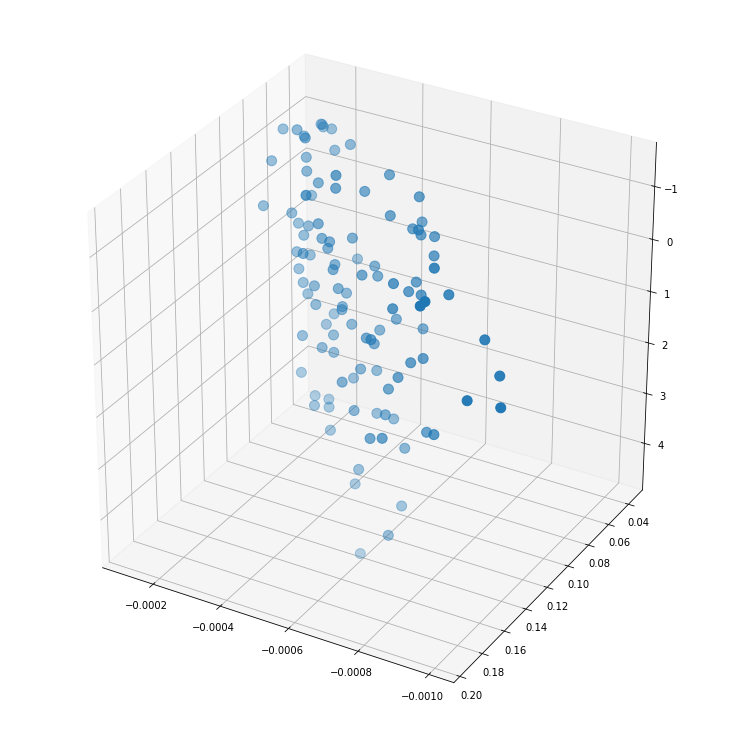

In [58]:
from mpl_toolkits.mplot3d import Axes3D
import random


fig = plt.figure(figsize = (10, 10))
ax = Axes3D(fig)

w0_list  = [coef_all[loc][0] for loc in countries_new]
w1_list  = [coef_all[loc][1] for loc in countries_new]
b_list  = [coef_all[loc][2] for loc in countries_new]
ax.set_xlim3d(left = np.percentile(w0_list,95), right = np.percentile(w0_list, 5))
ax.set_zlim3d(bottom = np.percentile(b_list,95), top = np.percentile(b_list, 5))
ax.set_ylim3d(bottom = np.percentile(w1_list,95), top = np.percentile(w1_list, 5))

ax.scatter(w0_list, w1_list, b_list, marker='o', s = 100)
fig.tight_layout()
plt.show()
